In [39]:
import json
import os
import cv2
import matplotlib.pyplot as plt

import cv2
import json
from src.lib.utils.pnp.cuboid_pnp_shell import pnp_shell
import matplotlib.pyplot as plt
import numpy as np
from src.lib.opts import opts
from itertools import permutations
import copy
import math



In [49]:
with open('data/synthetic_data/ordered_anno.json', 'r') as f:
    data = json.load(f)

img_data = data[6]

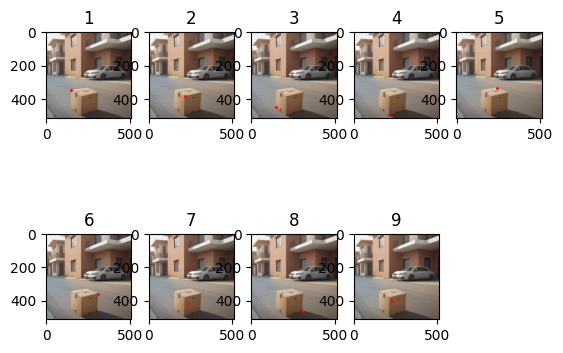

[[152, 347], [217, 381], [147, 448], [210, 496], [243, 333], [313, 361], [237, 423], [304, 462], [228, 405]]


In [50]:
img = plt.imread('data/synthetic_data/train/6.jpg')

for i, p in enumerate(img_data["projection"]):
     plt.subplot(2,5,i+1)
     plt.imshow(img)
     plt.plot(p[0], p[1],'ro',markersize=1)
     plt.title(f"{i+1}")
plt.show()

points = img_data["projection"]
print(points)

In [18]:
projection = [points[3], points[0], points[7], points[4], points[2], points[1], points[6], points[5], points[8]]

/tmp/ipykernel_55718/3720782844.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(p[0], p[1], cmap='b')


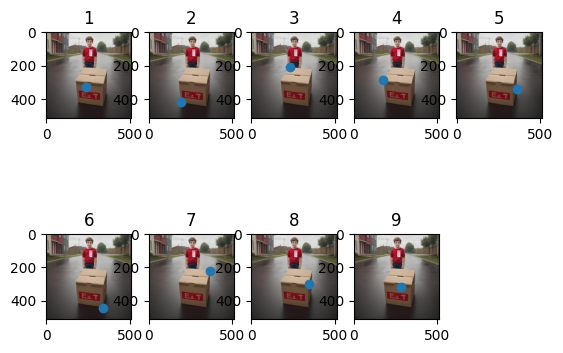

In [19]:
for i, p in enumerate(projection):
     plt.subplot(2,5,i+1)
     plt.imshow(img)
     plt.scatter(p[0], p[1], cmap='b')
     plt.title(f"{i+1}")
plt.show()

In [ ]:
opt = opts()
opt.nms = True
opt.obj_scale = True
opt.c = "cereal_box" # category

print(opt.nms, opt.obj_scale )

camera_cereal=np.array([[663.0287679036459, 0, 300.2775065104167], [0, 663.0287679036459, 395.00066121419275], [0, 0, 1]])
camera_ford=np.array([[3648, 0, 2736], [0, 3648, 1824], [0, 0, 1]], dtype=np.float32)

bbox= {'kps': points, "obj_scale": size}
meta={"width": img.shape[1],"height": img.shape[0], "camera_matrix":camera_cereal }

projected_points, point_3d_cam, scale, points_ori, bbox=pnp_shell(opt, meta, bbox, points, size, OPENCV_RETURN=False)